<a href="https://colab.research.google.com/github/prince1184/DSA-Bootcamp-Java/blob/main/Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Breast Cancer Analysis using Python

In [ ]:
# import necessary libraries to perform analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cancer_data_set = pd.read_csv("/content/breast cancer data set.csv")

In [ ]:
print(cancer_data_set)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# **Data set Understanding**

To check top rows aruguments given 15, if its default it takes 5 rows

# **Displaying Head**

In [ ]:
cancer_data_set.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


To check bottom rows aruguments given 15, if its default it takes 5 rows

# **Displaying Tail**

In [ ]:
cancer_data_set.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


Key Feature from Data frame head

id Column: contain the unique ids, therefore cannot be used for classification.

𝑑𝑖𝑎𝑔𝑜𝑛𝑠𝑖𝑠 column: With the binary Values → Target column containing the class 𝑙𝑎𝑏𝑒𝑙𝑠

𝑀 - 𝑀𝑎𝑙𝑖𝑔𝑛𝑎𝑛𝑡 - Tending to invade normal tissue

𝐵 - 𝐵𝑒𝑛𝑖𝑔𝑛 - not harmful in effect.

# **Data Acquisition**
**Displaying Type**

In [ ]:
print(cancer_data_set.dtypes)# to check the data type of the data set

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Displaying Null**

to check missing value in the data set, if data is missing we have to do correction, in this case there is no data missing isnull() will show true or false, if sum() added it will show in count

In [ ]:
cancer_data_set.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


**Display Size**

to count the number of elements along a given axis


In [ ]:
print("size of the DataFrame: ")
print(cancer_data_set.size)

size of the DataFrame: 
18208


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column count - The number of not-empty values. mean - The average (mean) value

In [ ]:
cancer_data_set.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Displaying shape**


In [ ]:
#shape that returns a tuple with each index having the number of corresponding elements

print("Shape of DataFrame: ")
print(cancer_data_set.shape)


Shape of DataFrame: 
(569, 32)


**Displaying Dimension**

In [ ]:
# to check the length of each dimention
print("Number of Dimensions:")
print(cancer_data_set.ndim)

Number of Dimensions:
2


# **Data Prepartion**

**Data preparation**

In [ ]:
# Creating the Target Class
# Storing the Class label or Target in --> y (M or B)
y_target = cancer_data_set.diagnosis

# Making a list of unwanted columns
list = ['id','diagnosis']

# Dropping the unnecessary Column
data = cancer_data_set.drop(list,axis = 1 ) # Dropping Column `axis = 1`, for rows `axis = 0`
data.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


**Creating the Pairplot from Seaborn**


In [ ]:
"""
Create dataset for finding contribution of individual features towards whether
or not a certain cancer tumor is malignant or benign.
"""

# Map values in diagnosis column, 0 representing benign  and 1 represeting malignant
cancer_data_set['diagnosis'] = cancer_data_set['diagnosis'].map({'B': 0, 'M': 1})
data_for_corr = cancer_data_set[['radius_mean', 'perimeter_mean', 'area_mean',
                               'compactness_mean', 'concavity_mean',
                               'concave points_mean', 'diagnosis']]
#Create data_for_corr with various features and diagnosis
data_for_corr.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,1



**B→0**

**M→1**

# **Data Exploration**

Pairplot from Seaborn to see relationship between individual features and diagnosis


**Pairplot**



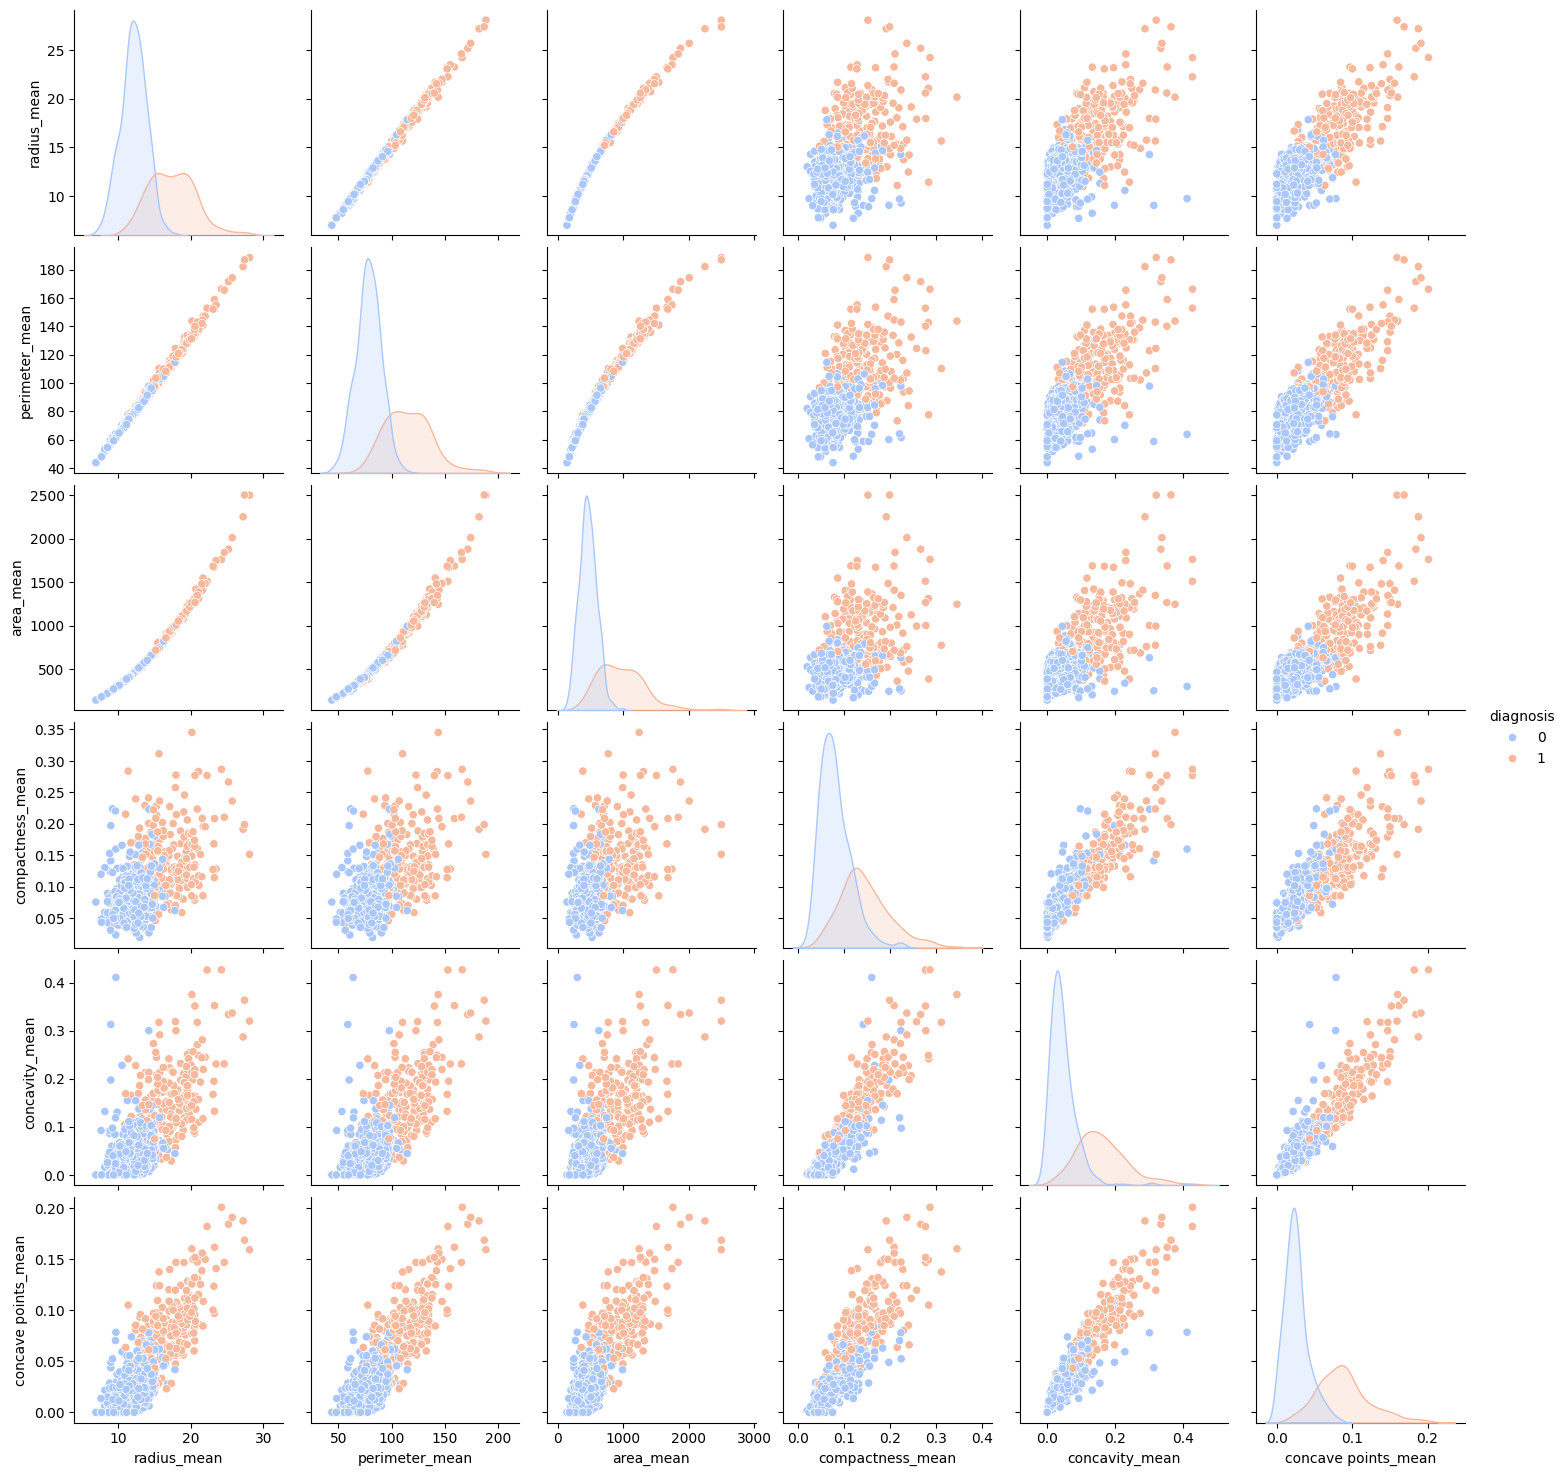

In [ ]:
sns.pairplot(data_for_corr, palette='coolwarm',hue= 'diagnosis')

**Separating and discretizing**

Now we have the two data frames: for the class labels y other for the features x

**Count plot**

Number of Benign tumors :  357
Number of Malignant tumors :  212


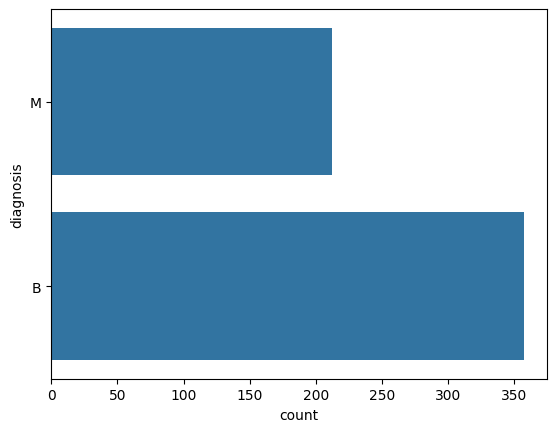

In [ ]:
# checking the distribution for Target Varible using seaborn library:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
ax = sns.countplot(y_target, label="Count") # countplot: tells us the count of each class in column.
B, M = y_target.value_counts() # Using -`value_counts` from the Pandas to store the individual count.
print('Number of Benign tumors : ', B)
print('Number of Malignant tumors : ', M)

In [ ]:
data.describe() # Pandas:- descriptive statistics

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# **Data Visualization**

**Visualizing Standardized Data with Seaborn**

Here some values are hundreds, intense and some are in zero points, very differenticated data, data that connot ploted easily so we have to standerdise it, should have similar standards to plot and understand to perform subtract data from its mean again devide it from data standard

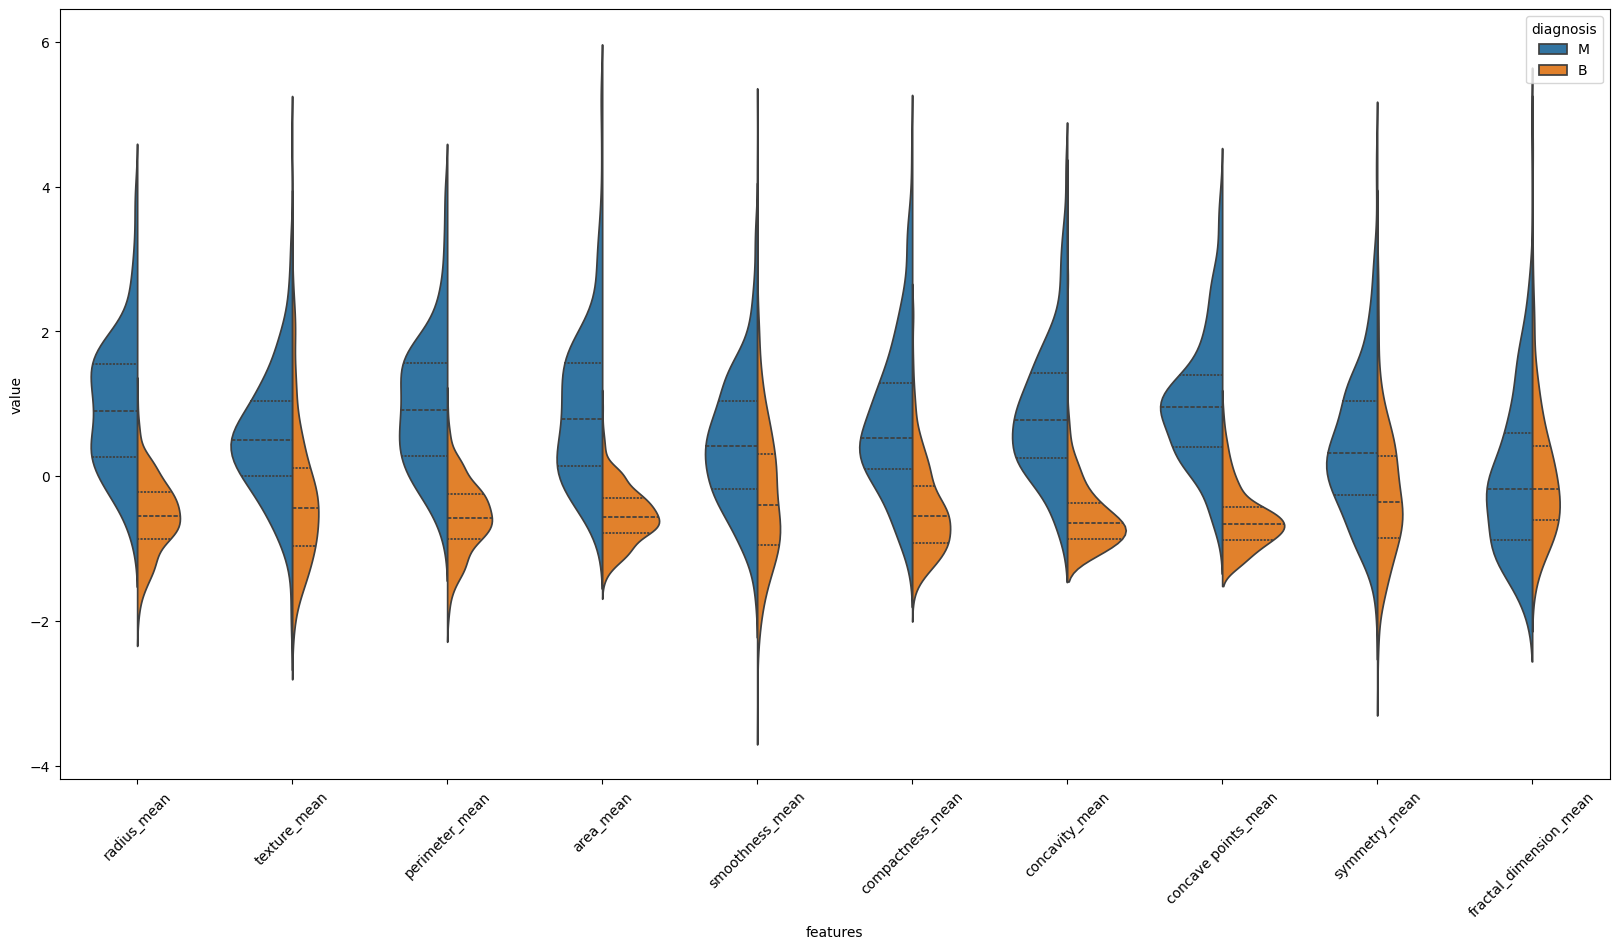

In [ ]:
# first ten features

x_features = data
data_n = (data - data.mean()) / (data.std())  # data normalization for plotting

# get all the features -- since axis = 1, Columnwise Concatenation
data_vis = pd.concat([y_target, data_n.iloc[:,0:10]], axis=1)

# let's flat the dataset
# `pd.melt` -- Unpivot the given DataFrame from wide format to long format
# it Massages a DataFrame into a right format
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))


sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True,
               inner = "quart"
               )

plt.xticks(rotation=45); # --matplotlib--

Interpreting the above violin plot in the texture_mean the median value of Malignent & banign are well seprated as compare to fractal_dimension_worst where the median of two Coincide with each other, this means that this could be a good value feature for classification.



**Violin Plots and Box Plots**

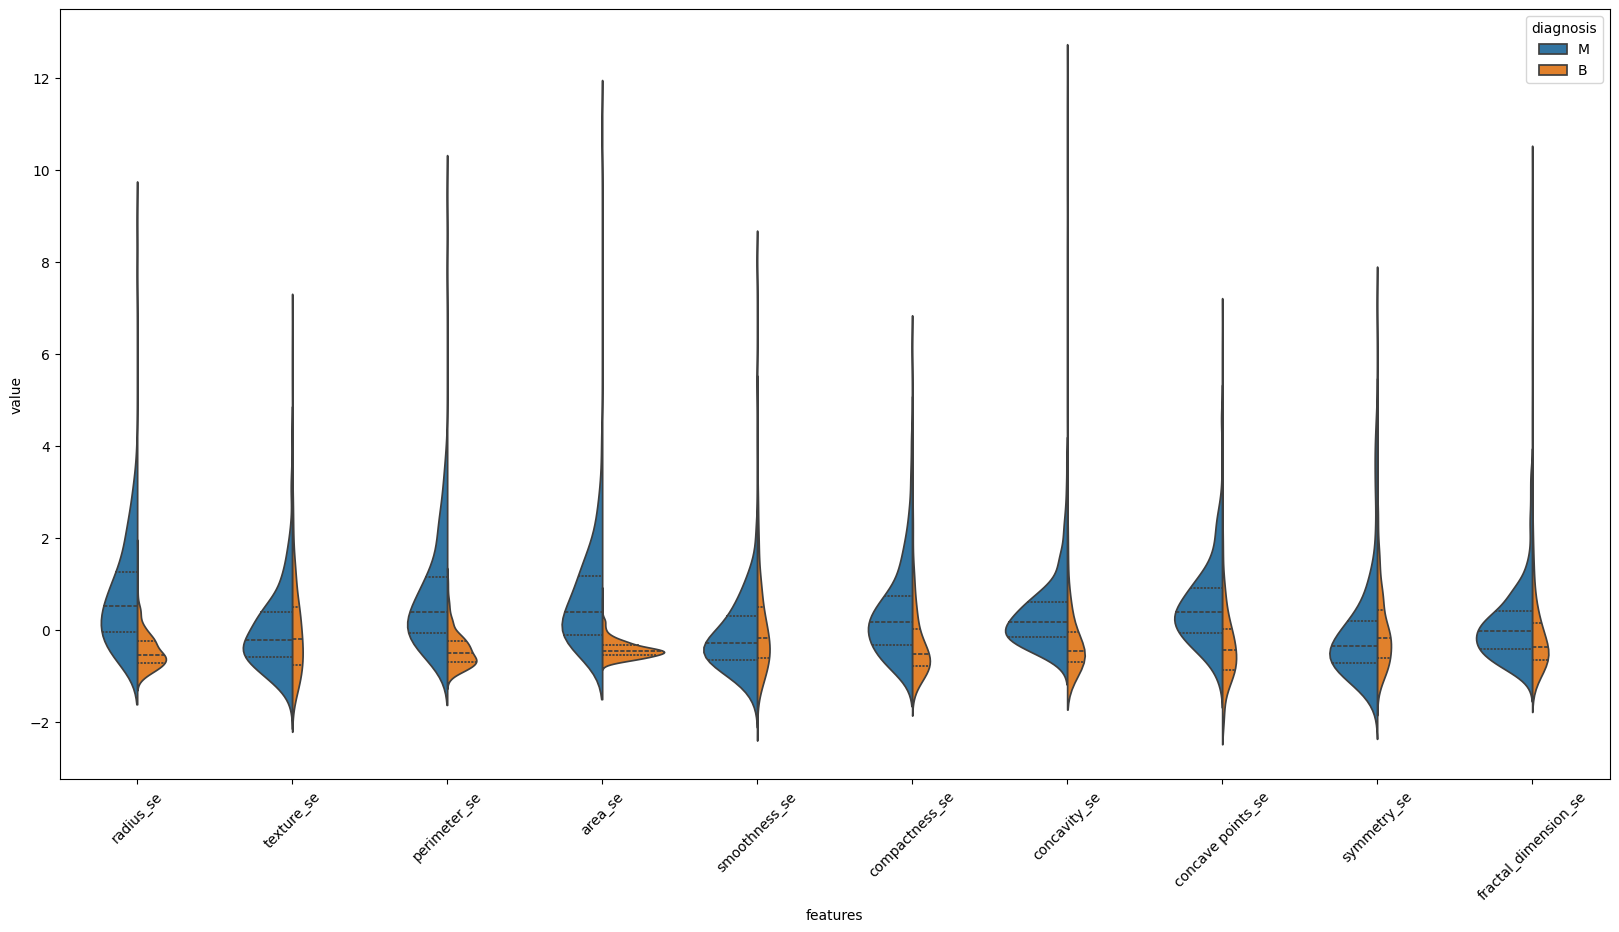

In [ ]:
# Second ten features
data_vis = pd.concat([y_target, data_n.iloc[:,10:20]], axis=1)

data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True,
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--

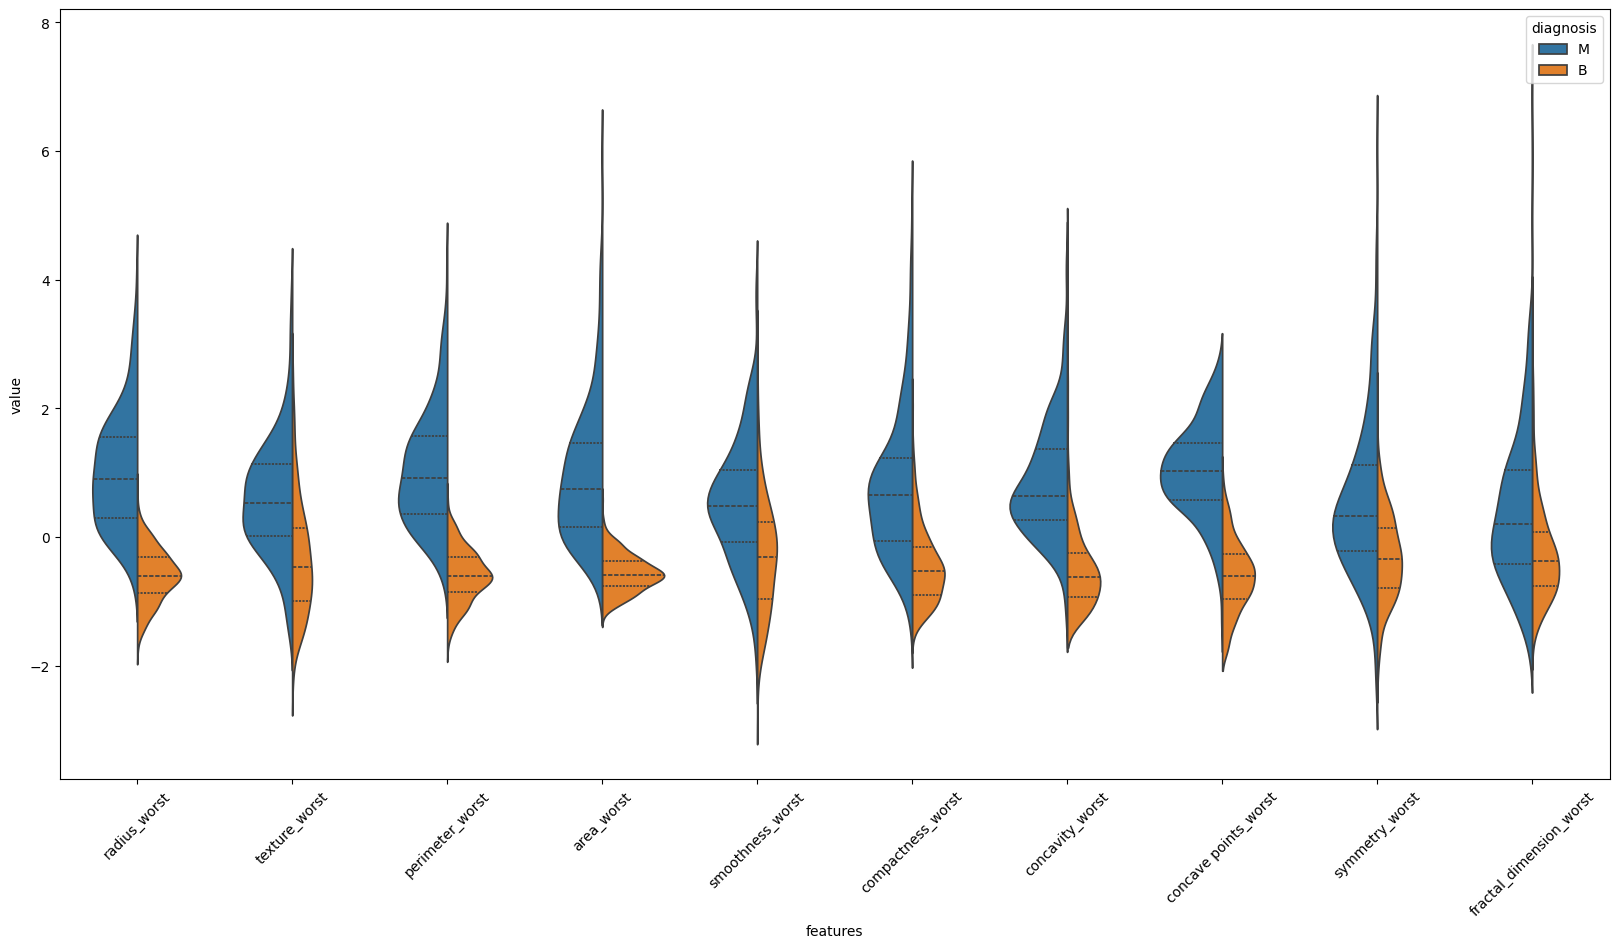

In [ ]:
# Third ten features
data_vis = pd.concat([y_target, data_n.iloc[:,20:31]], axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))

sns.violinplot(x = "features",
               y = "value",
               hue = "diagnosis",
               data = data_vis,
               split = True,
               inner = "quart")

plt.xticks(rotation=45); # --matplotlib--

Interpreting the above violin plot: Concavity_worst & Concave points_worst looks very similar, So how can we decide that are they co-related with each other or not, if they are co-related with each other then the best practice is to reduce the redundancey by dropping one of the column.

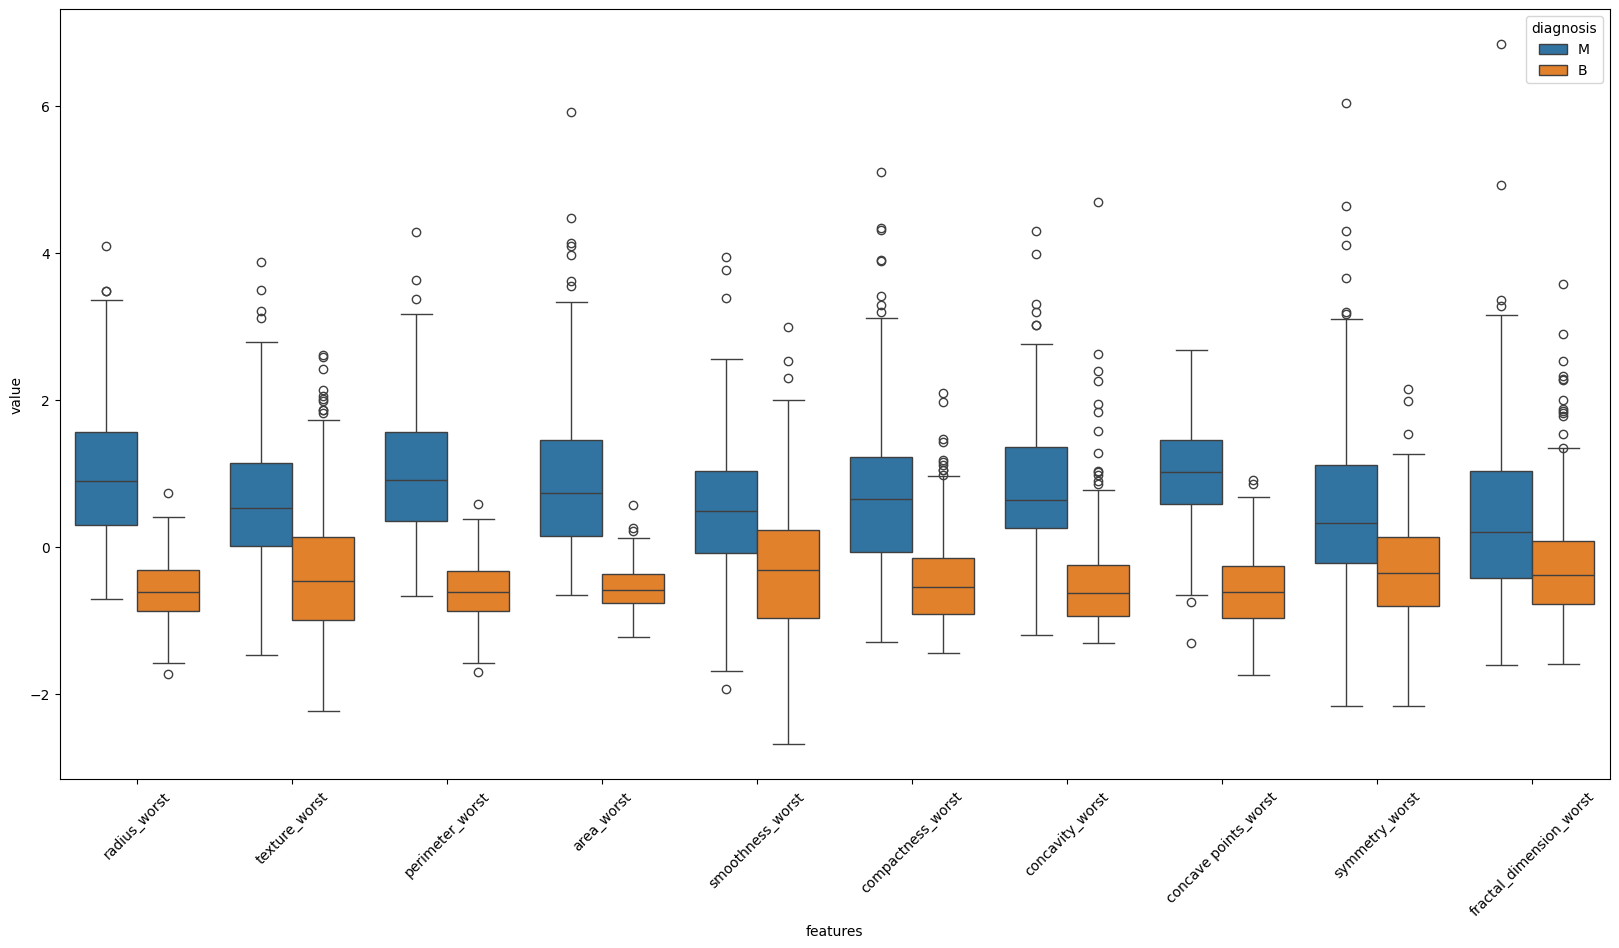

In [ ]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="diagnosis",
            data=data_vis)

plt.xticks(rotation=45);

BoxPlot are good alternative when we want to detect the outliers.

**Using Joint Plots for Feature Comparison**

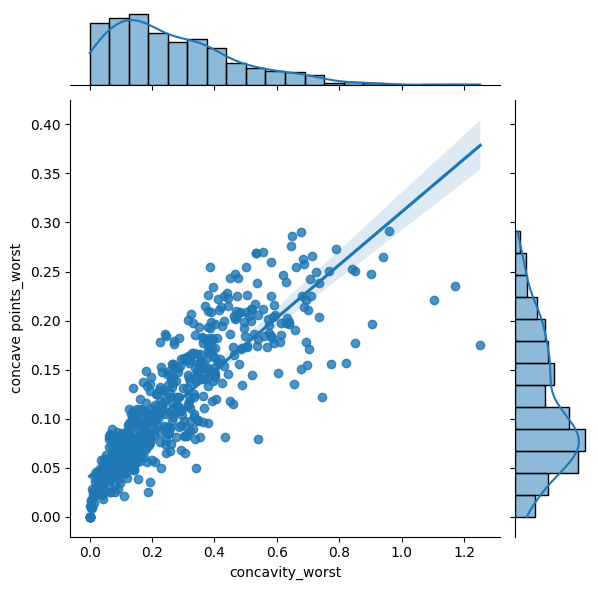

In [ ]:
# Checking how co-related the two feature are
sns.jointplot(x=x_features.loc[:,'concavity_worst'],
              y=x_features.loc[:,'concave points_worst'],
              kind="reg")

By looking the above joint plot we can say that these two feature are highly Co-related.



**Data Wrangling univatiate filters**

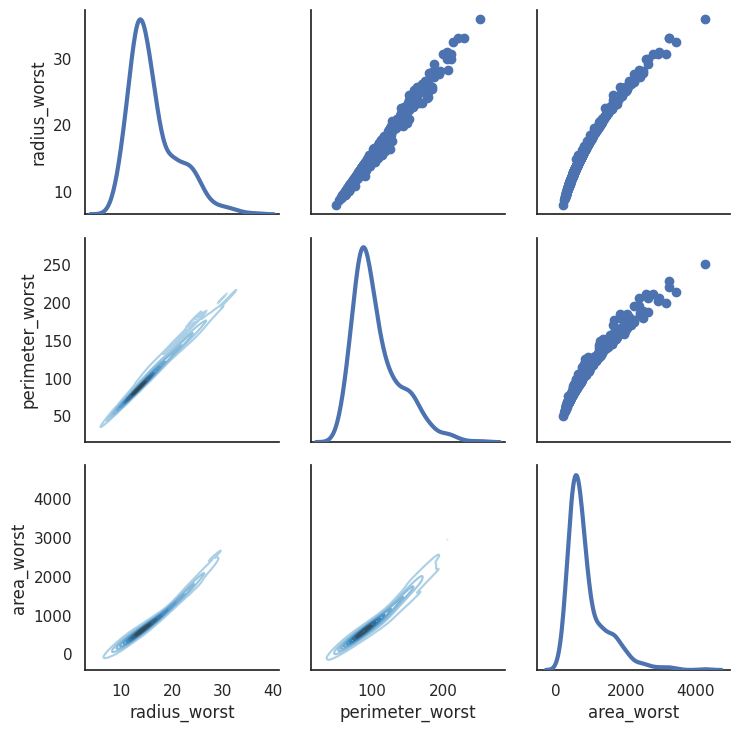

In [ ]:
sns.set(style="white")
df = x_features.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

**Observing the Distribution of Values and their Variance with Swarm Plots**

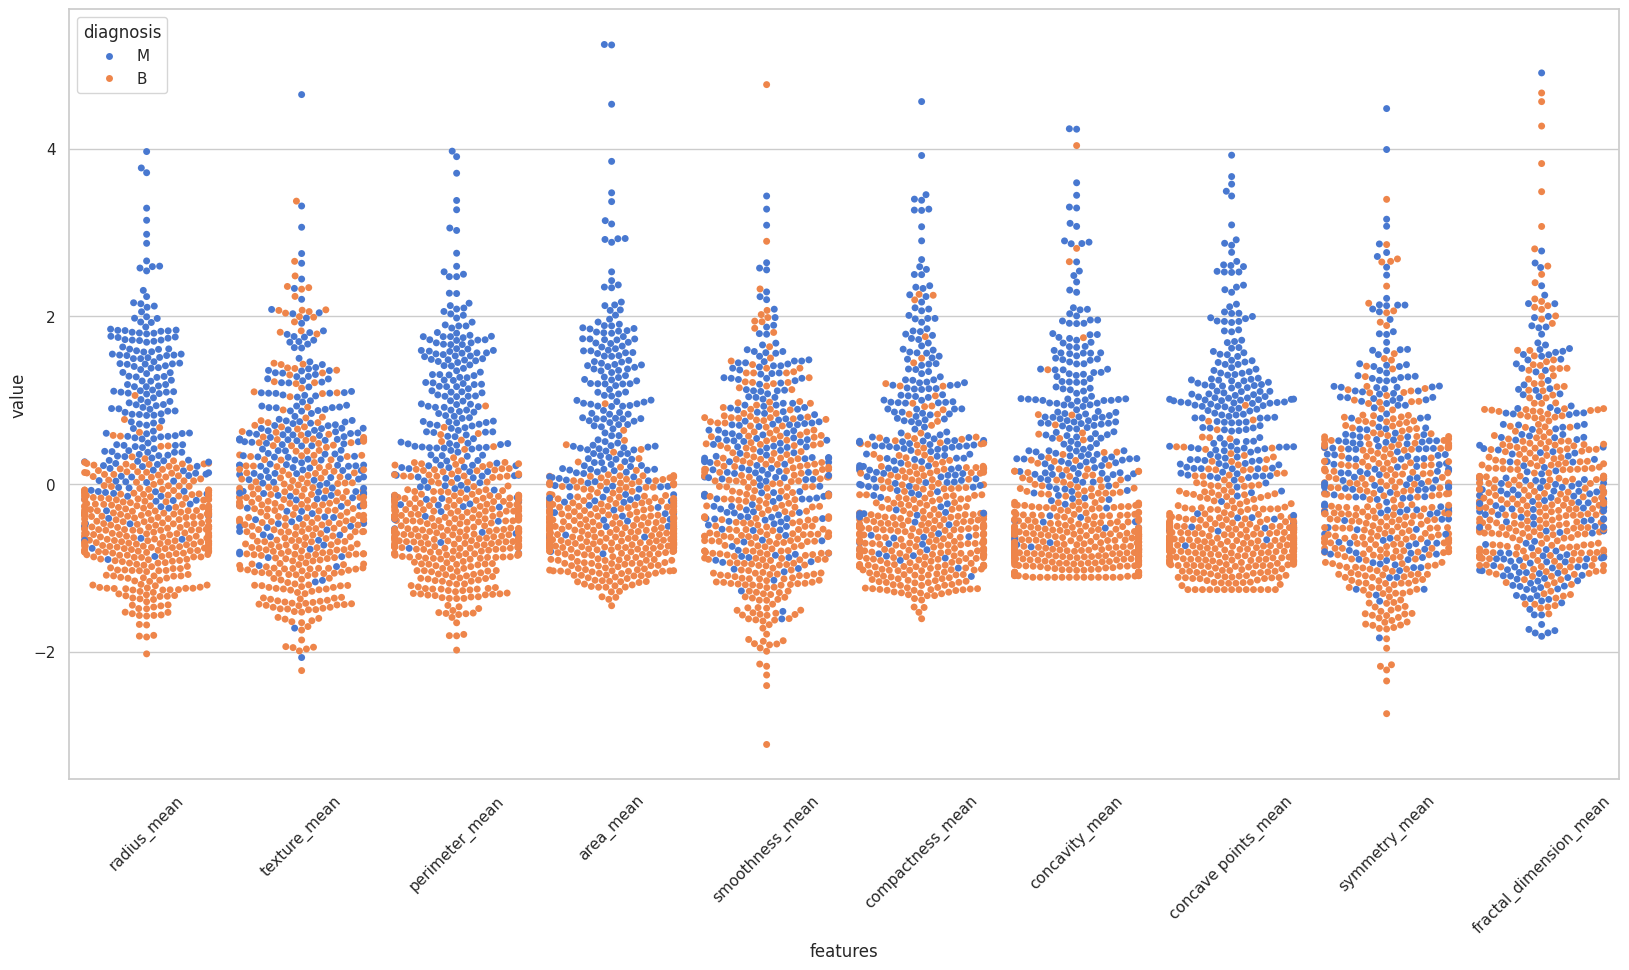

In [ ]:
# First Ten features

import warnings
warnings.simplefilter(action="ignore", category=UserWarning)
sns.set(style="whitegrid", palette="muted")
data_dia = y_target #data diameter

data_n = (data - data.mean()) / (data.std())

data_vis = pd.concat([y_target, data_n.iloc[:,0:10]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);

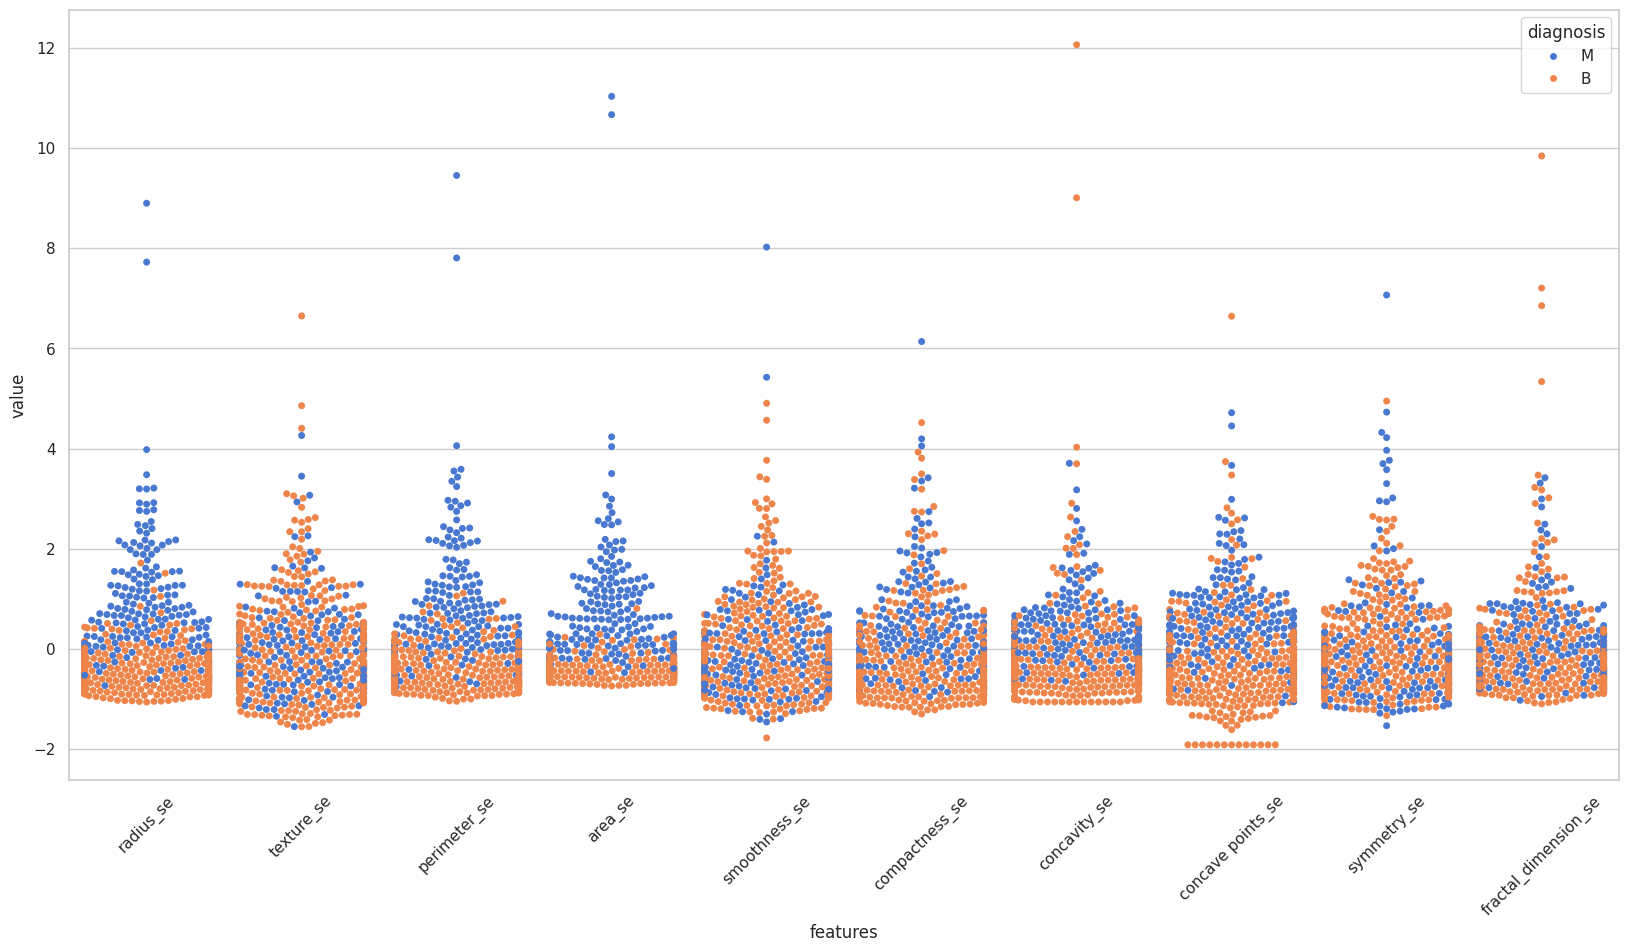

In [ ]:
# Second ten features

import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

data_vis = pd.concat([y_target, data_n.iloc[:,10:20]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);


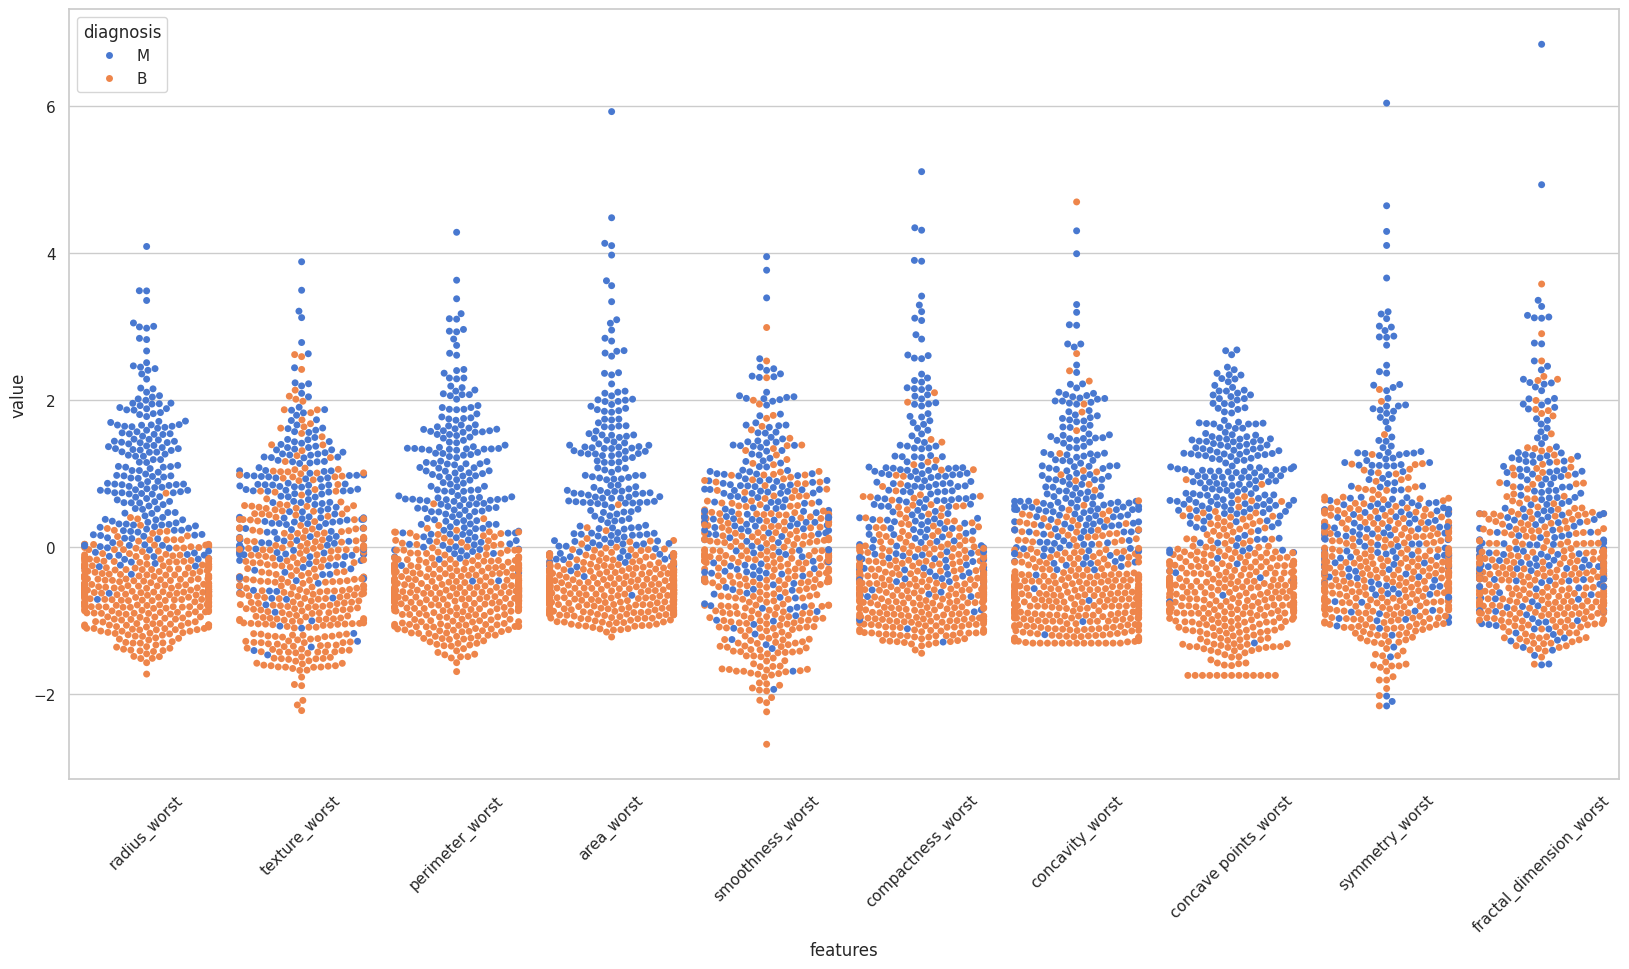

In [ ]:
# Third ten features

import warnings
warnings.simplefilter(action="ignore", category=UserWarning)

data_vis = pd.concat([y_target, data_n.iloc[:,20:31]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(20,10))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=45);

In [ ]:
#A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases
#where you want to show all observations along with some representation of the underlying distribution.

#So by looking at the variance of swarm plot we can tell how well seprated they are, & which features are best suitable for classification.


**how good we predict the target using correlation features**

In [ ]:
# Correlation of each feature and our target variable

data_vis = pd.concat([y_target, data_n.iloc[:,0:30]],axis=1)
data_vis = pd.melt(data_vis, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(30,20))
sns.swarmplot(x="features",
              y="value",
              hue="diagnosis",
              data=data_vis)

plt.xticks(rotation=90);

This plot provides a comprehensive overview of the relationship between each feature and the diagnosis in the breast cancer dataset. By analysing this plot, we can see that some features clearly differentiate between the malignant and benign diagnoses, such as 'radius_mean', 'area_mean', and 'concavity_mean'. Other features, such as 'smoothness_mean', 'symmetry_mean', and 'fractal_dimension_mean', do not show as clear of a difference between the two diagnoses.

**Observing all Pair-wise Correlations**

**Data Wrangling Heatmap**




*  Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1.
*   Values closer to zero means there is no linear trend between the two variables.


*   The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.

*   A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

*   The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation).
*   For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [ ]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(x_features.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap="YlGnBu")
plt.show()

**white cell → Highly Correlated**

**Black Cell → Non-correlated**

In this heat map light color values shows that are highly co realted, where as dark color are shows that not much co related 0.9 and its light and highly co realated. concavity_worst and concavity_mean, are very much co realated With 0.3 negetive value, radius_worst and fractal_dimention_mean are not corelated and its useful for further analysis

# **Data Wrangling Decision Tree Classifier**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_n.iloc[:,0:30], y_target, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
[...]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_n.iloc[:,0:30], y_target, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Evaluate the classifier on the testing set
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')

fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
[...]

In [ ]:
#evaluation metrics of the classifier on the testing set

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-score: {:.3f}'.format(f1))

This indicates that the classifier has an accuracy of 0.918, meaning that it correctly predicts the class label for 91.8% of the samples in the testing set. The precision, recall, and F1-score for the malignant class are 0.910, 0.907, and 0.909, respectively, indicating that the classifier is relatively good at identifying malignant tumors.